In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer = pd.read_csv(r'C:\\Users\\acer\\Desktop\\Ecommerce Customers') #importing data to dataframe

In [3]:
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


SO there are no missing values in our data.

## EXPLORATORY DATA ANALYSIS

In [5]:
customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


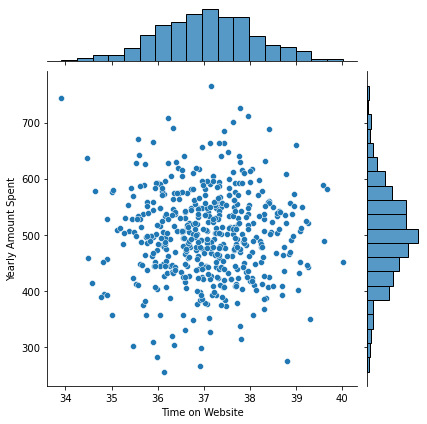

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customer)

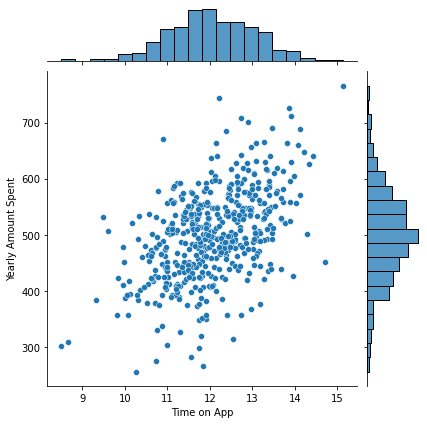

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customer)

This Shows the more time one spend on App more will be yearly amount spent





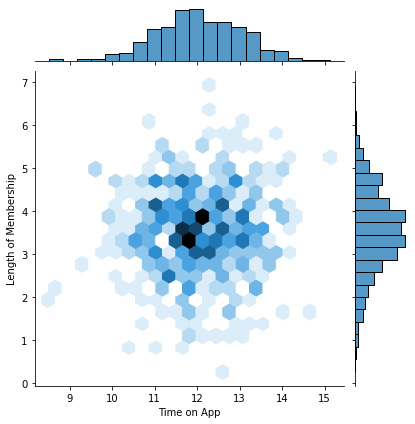

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customer, kind='hex')

Now we will explore relationship between the variables using joint plot

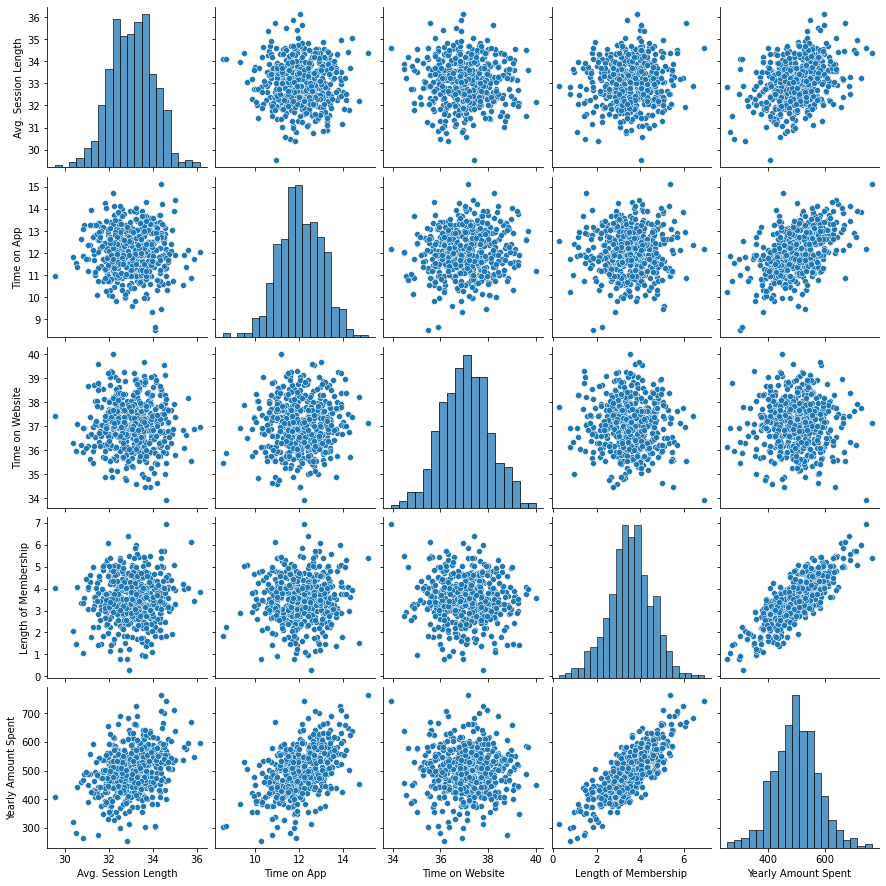

In [9]:
sns.pairplot(customer)

So the Joint plot reveals that Length of membership and yearly amount spent have high correlation between them as compared to other variables

*Lets Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership. *

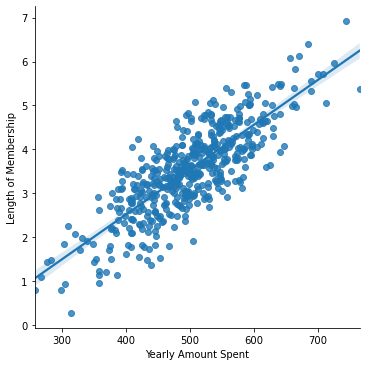

In [10]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customer)

## Lets Draw a heat map to check correlaton between all variables

<AxesSubplot:>

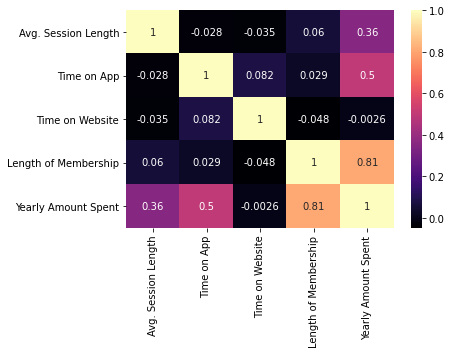

In [30]:
sns.heatmap(customer.corr(),cmap='magma',annot=True)

This also shows that only length of membership and yearly amout spent are highly correlated

Training and Testing Data 

In [11]:
customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = customer[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customer['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)

Training the Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()  #Create an instance of a LinearRegression() model named lm.

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
lm.coef_                  #Printing out the coefficients of the model

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [19]:
lm.intercept_             #Printing out the intercept of the model

-1047.9327822502385

In [20]:
pred = lm.predict(X_test)

<AxesSubplot:xlabel='Yearly Amount Spent'>

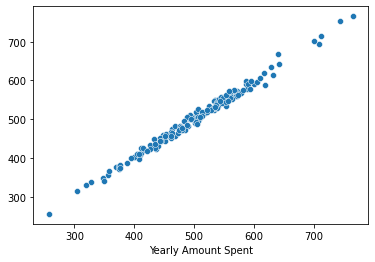

In [21]:
sns.scatterplot(x= y_test,y=pred)       # Creating a scatterplot of the real test values versus the predicted values. **

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = mse**0.5

In [24]:
print('mae =',mae)
print('mse =',mse)
print('rmse =',rmse)


mae = 7.228148653430838
mse = 79.81305165097461
rmse = 8.933815066978642


## PLOTTING THE RESIDUALS

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

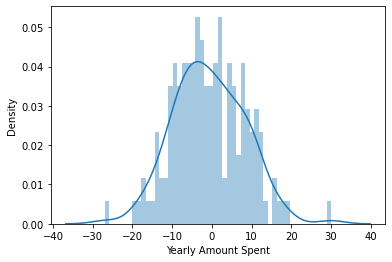

In [25]:
sns.distplot((y_test-pred),bins=50)

In [26]:
dt = pd.DataFrame(lm.coef_, X.columns, columns=['coefficients'])

In [27]:
dt

,coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

## Customer Clusturing 

## Using the elbow method to find the optimal number of clusters

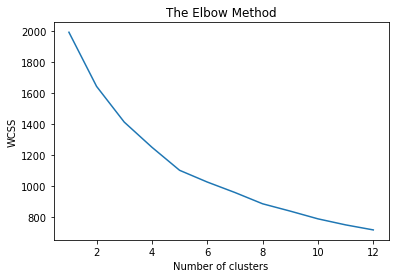

In [51]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we take num of clustures = 7

In [65]:
 kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
customer["Cluster"] = kmeans.fit_predict(X)

In [66]:
customer["Cluster"] = customer["Cluster"].astype("category")

In [67]:
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Cluster
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,4
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,5
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,5
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,1
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,4


In [68]:
Average = customer.groupby('Cluster').mean().reset_index()
Average.sort_values(by='Yearly Amount Spent')

,Cluster,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
6,6,33.255858,11.950585,37.164364,2.112751,412.915548
5,5,32.525717,11.163861,37.756383,3.641674,458.833398
2,2,33.403645,10.941321,35.773972,3.824553,481.983586
0,0,31.929085,12.429483,36.468726,3.730855,495.380829
4,4,32.820358,13.033280,38.163914,3.729035,545.006102
1,1,33.787764,13.014225,36.435219,3.653065,562.936332
3,3,34.229422,11.762762,37.342815,4.295722,565.953660


In [71]:
customer["Cluster"].value_counts() # no. of customer in each cluster

0    86
5    82
6    79
4    71
3    64
1    62
2    56
Name: Cluster, dtype: int64

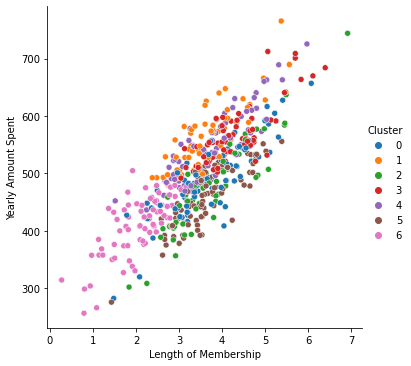

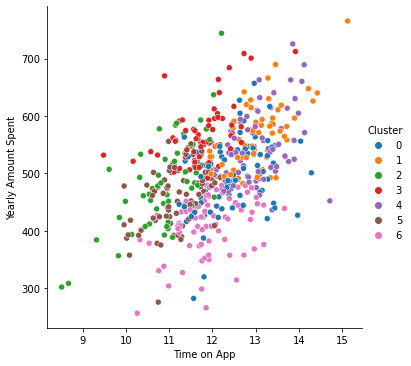

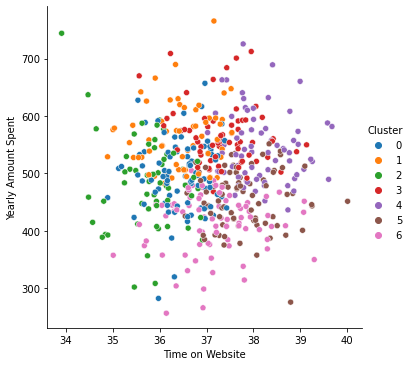

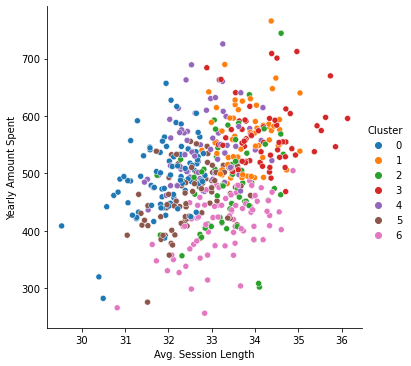

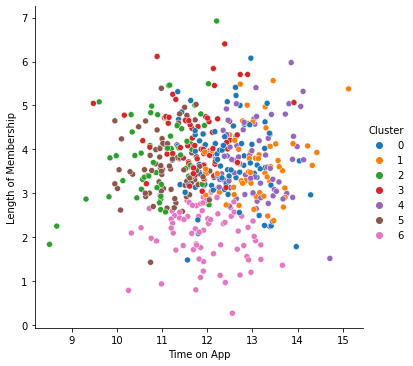

In [73]:
#VISUALIZE PLOT

sns.relplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customer, hue = 'Cluster')
sns.relplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customer, hue = 'Cluster')
sns.relplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customer, hue = 'Cluster')
sns.relplot(x = 'Avg. Session Length', y = 'Yearly Amount Spent', data = customer, hue = 'Cluster')
sns.relplot(x = 'Time on App', y = 'Length of Membership', data = customer, hue = 'Cluster')